In [1]:
import pandas as pd
import torch

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
df = pd.read_csv('/news_summary.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [6]:
df = df.dropna()

In [7]:
new_df = pd.DataFrame()
new_df['text'] = df['ctext']
new_df['summary'] = df['text']

In [8]:
new_df.head()

,text,summary
0,The Daman and Diu administration on Wednesday ...,The Administration of Union Territory Daman an...
1,"From her special numbers to TV?appearances, Bo...",Malaika Arora slammed an Instagram user who tr...
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotels in Mumbai and other Indian cities are t...,Hotels in Maharashtra will train their staff t...


In [9]:
new_df.count()

,0
text,4396
summary,4396


In [10]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:

lemmatizer = WordNetLemmatizer()
def data_cleaning(column, column_name=""):
    data = []
    for row in column:

        row=re.sub("(\\t)", ' ', str(row)).lower()
        row=re.sub("(\\r)", ' ', str(row)).lower()
        row=re.sub("(\\n)", ' ', str(row)).lower()

        row=re.sub("(__+)", ' ', str(row)).lower()
        row=re.sub("(--+)", ' ', str(row)).lower()
        row=re.sub("(~~+)", ' ', str(row)).lower()
        row=re.sub("(\+\++)", ' ', str(row)).lower()
        row=re.sub("(\.\.+)", ' ', str(row)).lower()

        row=re.sub(r"[<>()|&©ø\[\]\'\;~*]", ' ', str(row)).lower()

        row=re.sub("(mailto:)", ' ', str(row)).lower()
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower()
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower()
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower()


        row=re.sub("(\.\s+)", ' ', str(row)).lower()
        row=re.sub("(\-\s+)", ' ', str(row)).lower()
        row=re.sub("(\:\s+)", ' ', str(row)).lower()
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower()

        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass

        row = re.sub("(\s+)",' ',str(row)).lower()

        row=re.sub("(\s+.\s+)", ' ', str(row)).lower()

        tokens = word_tokenize(row)
        lemmatized_row = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
        data.append(lemmatized_row)

    data = pd.DataFrame({column_name: data})

    return data

In [12]:
text_clean = data_cleaning(new_df['text'], column_name='text')
summary_clean = data_cleaning(new_df['summary'], column_name='summary')

In [13]:
cleaned_df = pd.DataFrame()
cleaned_df['text'] = text_clean['text']
cleaned_df['summary'] = summary_clean['summary']

In [14]:
cleaned_df.head()

,text,summary
0,the daman and diu administration on wednesday ...,the administration of union territory daman an...
1,"from her special number to tv ? appearance , b...",malaika arora slammed an instagram user who tr...
2,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...
3,lashkar-e-taiba kashmir commander abu dujana w...,"lashkar-e-taiba kashmir commander abu dujana ,..."
4,hotel in mumbai and other indian city are to t...,hotel in maharashtra will train their staff to...


In [15]:
cleaned_df['text'][10]

'the food safety and standard authority of india fssai is in the process of creating network of food banking partner to collect and distribute leftover food from large party and wedding to the hungry.a notification to create separate category of food business operator fbos who will be licensed to deal only with leftover food , ha been drafted to ensure the quality of food . ? we are looking at partnering with ngo or organisation that collect , store and distribute surplus food to ensure they maintain certain hygiene and health standard when handling food , ? said pawan agarwal , ceo of fssai . ? tonne of food is wasted annually we are looking at creating mechanism through which food can be collected from restaurant , wedding , large-scale party , ? say pawan agarwal , ? all food , whether it is paid for or distributed free , must meet the country ? s food safety and hygiene standard , ? he said.the organisation in the business of collecting leftover food will now have to work in collab

In [16]:
cleaned_df['summary'][10]

'india food regulator food safety and standard authority of india fssai is planning to create network to collect leftover food and provide it to the needy it is looking to connect with organisation which can collect , store and distribute leftover food from wedding and large party it further added that all food must meet the safety and hygiene standard .'

In [17]:
text_len = []
summary_len = []
for i in range(len(cleaned_df)):
    text_len.append(len(cleaned_df['text'][i].split()))
    summary_len.append(len(cleaned_df['summary'][i].split()))

Maximum_Text_Length = max(text_len)
Maximum_Summary_Length = max(summary_len)

In [18]:
print(Maximum_Text_Length)
print(Maximum_Summary_Length)

12416
77


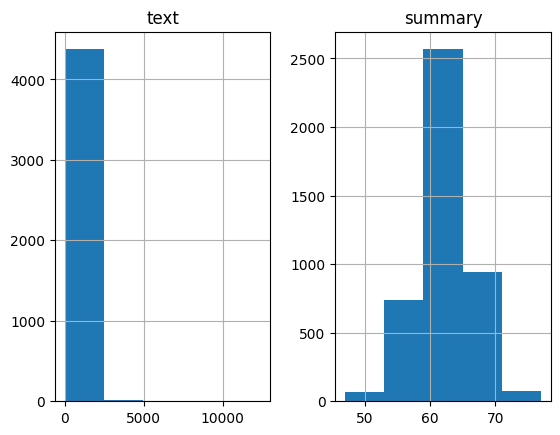

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

graph_df= pd.DataFrame()
graph_df['text']=text_len
graph_df['summary']=summary_len

graph_df.hist(bins = 5)
plt.show()


In [20]:
cnt_text = 0
cnt_summary = 0
for i in range(len(text_len)):
    if text_len[i] <= 2500:
      cnt_text += 1
    if summary_len[i] <= 70:
      cnt_summary += 1

print(cnt_text)
print(cnt_summary)

4374
4319


In [21]:
max_text_len = 2500
max_summary_len = 70

filtered_text = []
filtered_summary = []

for i in range(len(cleaned_df['text'])):
    text_length = len(cleaned_df['text'][i].split())
    summary_length = len(cleaned_df['summary'][i].split())

    if (summary_length <= max_summary_len and
        text_length <= max_text_len):
        filtered_text.append(cleaned_df['text'][i])
        filtered_summary.append(cleaned_df['summary'][i])

cleaned_df = pd.DataFrame({'text': filtered_text, 'summary': filtered_summary})

In [22]:
cleaned_df.head()

,text,summary
0,the daman and diu administration on wednesday ...,the administration of union territory daman an...
1,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...
2,hotel in mumbai and other indian city are to t...,hotel in maharashtra will train their staff to...
3,an alleged suspect in kidnapping case wa found...,a 32-year-old man on wednesday wa found hangin...
4,"in an interesting ruling , the delhi high cour...",the delhi high court reduced the compensation ...


In [23]:
cleaned_df.count()

,0
text,4297
summary,4297


In [24]:
from sklearn.model_selection import train_test_split
import datasets
from datasets import DatasetDict

In [25]:
train, test = train_test_split(cleaned_df, test_size=0.1, shuffle=True)

In [26]:
print(train.count())
print(test.count())

text       3867
summary    3867
dtype: int64
text       430
summary    430
dtype: int64


In [27]:
train = datasets.Dataset.from_pandas(train)
train = train.remove_columns(["__index_level_0__"])

In [28]:
train = train.train_test_split(test_size=0.2, shuffle=True)

In [29]:
train['train'][0]

{'text': 'a man gagged and stabbed his five-year-old son who wa demanding two rupee for buying kite , the child leaving him severely injured in sarnath area in varanasi , police said on monday.the incident occurred on sunday when shivam , class student , wa attacked by his father vinod rajbhar , 35 , when he demanded r two from him for buying kite.vinod , who work a tourist guide and life in ganj area with his wife gyatri , 32 , daughter komal , 3 , and two son shivam and satyam , 10 , and wa reportedly facing financial crisis , police said.irked by the demand , vinod , who wa in an inebriated condition , took shivam to the terrace of the house , where he first gagged him and then stabbed him severely , police said.his other son satyam , who saw him attacking his brother , informed his mother gyatri and together they intervened before rushing the child to hospital , they said.the neighbour after hearing their cried gathered at the house and informed police after which vinod wa arrested

In [30]:
train['test'][0]

{'text': 'traffic to tourist destination shimla , manali and dalhousie were cut off from the rest of himachal pradesh on saturday following heavy snowfall overnight , official said.electricity supply wa snapped in shimla and manali a power line were damaged due to falling trees.nearly 50 tourist are stranded in kothi , manali due to road blockade effort are being made to rescue them.traffic bound for shimla wa disrupted at shogi , about 15 km from shimla , due to snowfall , an official said.likewise , traffic on the national highway-21 wa also blocked near patlikuhl , 20 km before manali season first snowfall this is the season first significant snowfall that froze shimla.the cold weather resulted in the freezing of tap according to the met report , certain area in shimla like the mall road , the ridge , the u club and jakhu hill got more than foot of snow.also read kashmir incessant snowfall cripple normal life , impact traffic , flight also read stuck for more than hour hundred stran

In [31]:
train_val_df = DatasetDict({
    'train': train["train"],
    'val': train['test']})

print(type(train_val_df))
train_val_df

<class 'datasets.dataset_dict.DatasetDict'>


DatasetDict({
    train: Dataset({
        features: ['text', 'summary'],
        num_rows: 3093
    })
    val: Dataset({
        features: ['text', 'summary'],
        num_rows: 774
    })
})

In [32]:
from transformers import AutoTokenizer

model_checkpoint = 'google-t5/t5-small'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [33]:
max_input_length = 2000
max_target_length = 128

def preprocess_df(data):
    model_inputs = tokenizer(
        data["text"],
        max_length=max_input_length,
        truncation=True,
    )
    labels = tokenizer(
        data["summary"], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


In [34]:
tokenized_df = train_val_df.map(preprocess_df, batched=True)

Map:   0%|          | 0/3093 [00:00<?, ? examples/s]

Map:   0%|          | 0/774 [00:00<?, ? examples/s]

In [35]:
tokenized_df

DatasetDict({
    train: Dataset({
        features: ['text', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 3093
    })
    val: Dataset({
        features: ['text', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 774
    })
})

In [36]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [37]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model_checkpoint)

In [38]:
from transformers import Seq2SeqTrainingArguments
batch_size = 4
num_train_epochs = 4

args = Seq2SeqTrainingArguments(
    output_dir = "/content/model_output",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,
    fp16=True,
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [39]:
!pip install rouge

In [40]:
import numpy as np
from rouge import Rouge

In [41]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    rouge = Rouge()
    result = rouge.get_scores(decoded_preds, decoded_labels, avg=True, ignore_empty=True)

    return result

In [42]:
from transformers import Seq2SeqTrainer
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset = tokenized_df["train"],
    eval_dataset = tokenized_df["val"],
    data_collator = data_collator,
    tokenizer = tokenizer,
    compute_metrics = compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [43]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge-1,Rouge-2,Rouge-l
1,2.299900,1.949779,"{'r': 0.14187154107877453, 'p': 0.6010376999290596, 'f': 0.22681891296018947}","{'r': 0.05818614035095095, 'p': 0.3132722899366768, 'f': 0.09692562762136651}","{'r': 0.12371640917572108, 'p': 0.5270258568423187, 'f': 0.19798603215227956}"
2,2.069700,1.885937,"{'r': 0.14060988996090304, 'p': 0.599832404637467, 'f': 0.2251171046962271}","{'r': 0.058480893513893316, 'p': 0.31707816121575827, 'f': 0.0975230504928252}","{'r': 0.1224893745285528, 'p': 0.5251104401754201, 'f': 0.19626722264340415}"
3,2.020800,1.855266,"{'r': 0.140045033424195, 'p': 0.5951839993449672, 'f': 0.22407642279495654}","{'r': 0.0580418185074031, 'p': 0.3123246104607255, 'f': 0.09671632226361934}","{'r': 0.12182012742072724, 'p': 0.5199979850544146, 'f': 0.19506817741872842}"
4,1.998700,1.849242,"{'r': 0.14076239342424998, 'p': 0.5984518877872741, 'f': 0.22518217323004866}","{'r': 0.058607834892531685, 'p': 0.3160960483378405, 'f': 0.09766362082854631}","{'r': 0.1229059820959108, 'p': 0.525132177591708, 'f': 0.19678315165584057}"


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control

TrainOutput(global_step=3096, training_loss=2.087012219490623, metrics={'train_runtime': 1227.3146, 'train_samples_per_second': 10.081, 'train_steps_per_second': 2.523, 'total_flos': 2851952839655424.0, 'train_loss': 2.087012219490623, 'epoch': 4.0})

In [47]:
save_directory = "/Users/arpitsrivastav/Desktop/news-summarization"

model.save_pretrained(save_directory)

tokenizer.save_pretrained(save_directory)


('/Users/arpitsrivastav/Desktop/news-summarization/tokenizer_config.json',
 '/Users/arpitsrivastav/Desktop/news-summarization/special_tokens_map.json',
 '/Users/arpitsrivastav/Desktop/news-summarization/spiece.model',
 '/Users/arpitsrivastav/Desktop/news-summarization/added_tokens.json',
 '/Users/arpitsrivastav/Desktop/news-summarization/tokenizer.json')

In [ ]:
from transformers import pipeline

In [ ]:
pipe = pipeline("summarization", model=save_directory, tokenizer=tokenizer, device=device)

In [ ]:
temp=pipe(["China have won the first gold medal of Paris 2024 Olympics. Chinese shooters Sheng Lihao and Huang Yuting defeated South Korea's Keum Ji-hyeon and Park Ha-jun 16-12 to bag gold medal in 10m Air Rifle mixed team event. Kazakhstan bagged bronze medal in the event, while Germany finished fourth. Indian shooters Ramita and Arjun Babuta finished sixth."])

Your max_length is set to 200, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


In [ ]:
temp[0]['summary_text']

"sheng Lihao and Huang Yuting defeated south Korea's Keum Ji-hyeon and Park Ha-jun 16-12 to bag gold medal in 10m air Rifle mixed team event ."

In [ ]:
temp2 = pipe(["China’s residential slump deepened in August, as expectations of a further drop in new-home prices hampered the country’s efforts to cushion the downturn. The value of new-home sales from the 100 biggest real estate companies fell about 26.8 per cent from a year earlier to 251 billion yuan ($35.4 billion), faster than the 19.7 per cent decline in July, according to preliminary data from China Real Estate Information Corp. The accelerating slide shows the waning impact of the latest rescue package unveiled in May. At least 10 city governments have loosened or scrapped new-home price guidances to let market demand play a bigger role, a move that is expected to drive more real estate companies to cut prices. The sector continues to be a drag on China’s economy, which needs more stimulus to meet the government’s 5 per cent growth target this year, according to Bloomberg Economics. The crisis has weighed on everything from the job market to consumption and household wealth over the past two years. China has been considering a new funding option for local governments to buy unsold homes to prop up the market, people familiar said in August. The latest proposal would allow local governments fund their home purchases via so-called special bonds, the people said. The country had 382 million square meters of unsold new homes as of July, equivalent to about the size of Detroit, according to the latest official data. Cash-strapped developers — many in default for more than a year — are counting on a sales revival to persuade debt holders and fight off liquidation. Dexin China Holdings Co. in June became the latest builder to be ordered to liquidate by a Hong Kong court. Country Garden Holdings Co. is considering extending payments on some of its yuan bonds again, Bloomberg News reported earlier this week."])


In [ ]:
temp2[0]['summary_text']

'the value of new-home sales from the 100 biggest real estate companies fell about 26.8 per cent from a year earlier to 251 billion yuan ($35.4 billion), faster than the 19.7 per cent decline in July . the accelerating slide shows the waning impact of the latest rescue package unveiled in may .'